In [2]:
import pandas as pd
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
data['Sorting Time']=data['Sorting Time'].astype('float64')

In [5]:
data=data.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10.0
1,13.50,4.0
2,19.75,6.0
3,24.00,9.0
4,29.00,10.0
5,15.35,6.0
6,19.00,7.0
7,9.50,3.0
8,17.90,10.0
9,18.75,9.0


# Correlation

In [6]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

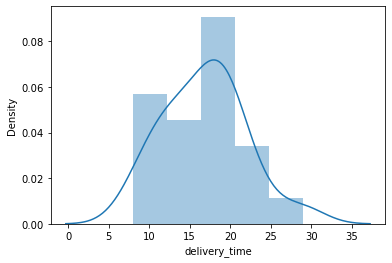

In [7]:
import seaborn as sns
sns.distplot(data['delivery_time'])

In [8]:
from scipy.stats import skew

In [9]:
data.skew(axis=0, skipna=True)

delivery_time    0.352390
sorting_time     0.047115
dtype: float64

C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

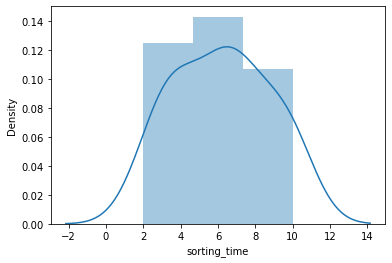

In [10]:

sns.distplot(data['sorting_time'])

##### LOG Transformation

In [11]:
import numpy as np
data_log = np.log(data)

C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

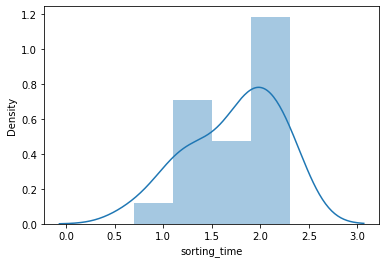

In [12]:
sns.distplot(data_log['sorting_time'])

C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

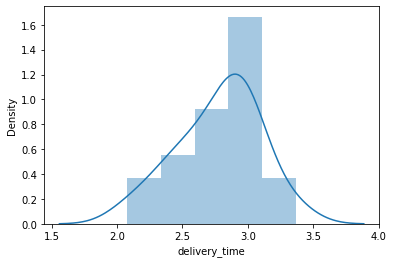

In [13]:
sns.distplot(data_log['delivery_time'])

##### Square Root Transformation

C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

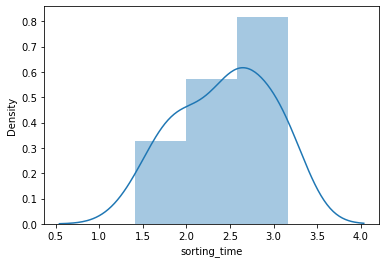

In [16]:
data_sqrt = np.sqrt(data)
sns.distplot(data_sqrt['sorting_time'])

C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

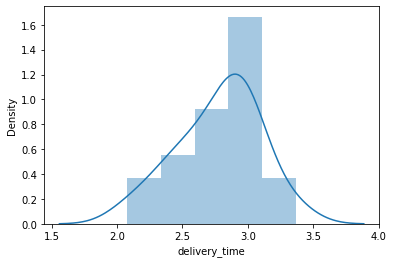

In [17]:
sns.distplot(data_log['delivery_time'])

##### Sqaure Transformation

C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

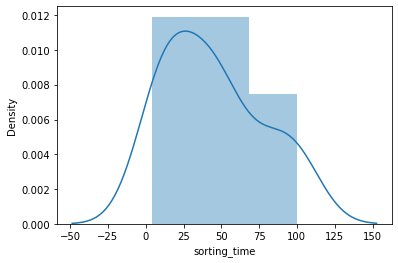

In [18]:
data_sq = np.square(data)
sns.distplot(data_sq['sorting_time'])

C:\Users\Ekata\a\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

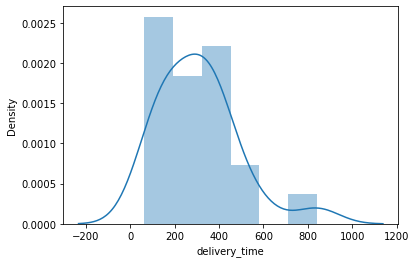

In [19]:
sns.distplot(data_sq['delivery_time'])

In [20]:
data_log.corr()

#for finding correlation between dependant and independant variable
#log dataset has highest corelation9988

,delivery_time,sorting_time
delivery_time,1.000000,0.878727
sorting_time,0.878727,1.000000


# Fitting a Linear Regression Model

In [21]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = data_log).fit()

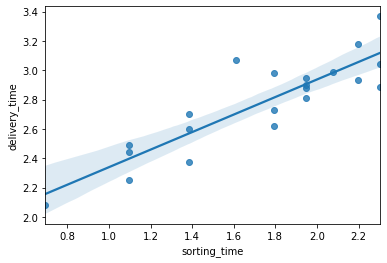

In [22]:
sns.regplot(x="sorting_time", y="delivery_time", data=data_log);

In [23]:
#Coefficients
model.params

Intercept       1.741987
sorting_time    0.597522
dtype: float64

In [24]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues) 

Intercept       13.085552
sorting_time     8.024484
dtype: float64 
 Intercept       5.921137e-11
sorting_time    1.601539e-07
dtype: float64


In [25]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.77216134926874, 0.7601698413355158)

# # Predict for new data point

In [26]:
#Predict for 12 and 13
newdata=pd.Series([12,13])
newdata

0    12
1    13
dtype: int64

In [27]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])
data_pred

,sorting_time
0,12
1,13


In [28]:
model.predict(data_pred)

0    8.912255
1    9.509777
dtype: float64

In [29]:
model.params

Intercept       1.741987
sorting_time    0.597522
dtype: float64

In [30]:
#y= mx+c
12*0.597522 +1.741987

8.912251